In [49]:
import pandas as pd
from tqdm import tqdm
import numpy as np
from numpy import random as nr
def is_leap_year(year):
    if (year % 4 == 0 and year % 100 != 0) or year % 400 == 0:
        return True
    else:
        return False
def days(year, month, day):
    leap_year = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    no_leap_year = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    if is_leap_year(year):
        result = sum(leap_year[:month - 1]) + day
    else:
        result = sum(no_leap_year[:month - 1]) + day
    if year == 2018:
        return result+365
    return result
def getyears(string):
    year = round(string/10000)
    return year
def getmonths(string):
    year = round(string/10000)*10000
    year = string - year
    month = round(year/100)
    return month
def getdays(string):
    year = round(string/10000)*10000
    string = string - year
    month = round(string/100)*100
    day = string - month
    return day
df=pd.read_csv('C:/Users/xyttttt/Desktop/goodsale.csv',low_memory=False)
df=df.loc[df['data_date'] >= 20180101]
res = pd.read_csv('C:/Users/xyttttt/Desktop/submit.csv')
r,c = res.shape
sku_id = 'SKY0RuBE'
#print df.iloc[:,0].size
df1=df.loc[df['sku_id']==sku_id]
#df1.iloc[:,0].size
df2=df1.sort_values(by = 'data_date',axis = 0,ascending = True).reset_index()
a=df2.ix[[df2.iloc[:,0].size-1]].values[0][1]
b=df2.ix[[0]].values[0][1]
#days(getyears(a),getmonths(a),getdays(a))-days(getyears(b),getmonths(b),getdays(b))
df2

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:44: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


,index,data_date,goods_id,sku_id,goods_num,goods_price,orginal_shop_price
0,57273,20180107,GFWOIA,SKY0RuBE,1,17.99,21.99
1,3233266,20180122,GFWOIA,SKY0RuBE,2,15.49,21.99
2,1275587,20180123,GFWOIA,SKY0RuBE,1,16.99,21.99
3,7320476,20180124,GFWOIA,SKY0RuBE,1,12.99,21.99
4,3309082,20180125,GFWOIA,SKY0RuBE,1,13.99,21.99
5,4055370,20180129,GFWOIA,SKY0RuBE,1,12.99,21.99
6,5280036,20180201,GFWOIA,SKY0RuBE,1,14.99,21.99
7,2635625,20180211,GFWOIA,SKY0RuBE,3,13.99,21.99
8,7319590,20180213,GFWOIA,SKY0RuBE,1,13.99,21.99
9,5058314,20180214,GFWOIA,SKY0RuBE,1,16.99,21.99


In [97]:
import pandas as pd
from tqdm import tqdm
import numpy as np
from numpy import random as nr

df=pd.read_csv('C:/Users/xyttttt/Desktop/goodsale.csv',low_memory=False)
#df=df.loc[df['data_date'] >= 20180101]
res = pd.read_csv('C:/Users/xyttttt/Desktop/submit.csv')
r,c = res.shape
for i in range(r):
    sku_id = res.iloc[i,0]
    df1=df.loc[df['sku_id']==sku_id]
    print(df1.iloc[:,0].size )

6
30
184
58
13
9
35
10
3
45
4
14


In [36]:
import pandas as pd
from tqdm import tqdm
import numpy as np
from numpy import random as nr

df=pd.read_csv('C:/Users/xyttttt/Desktop/goodsale.csv',low_memory=False)
df=df.loc[df['data_date'] >= 20180101]
cols = [col for col in df.columns if col in['sku_id','goods_num']]
df = df.loc[:, cols]
df_group = df.groupby('sku_id')
df_mean = df_group.mean()
df_mean = df_mean*7

res = pd.read_csv('C:/Users/xyttttt/Desktop/submit.csv')
r,c = res.shape
for i in tqdm(range(r)):
    sku_id = res.iloc[i,0]
    if sku_id in df_mean.index:
        rand = nr.normal(0,0.5,size = (5,1))
        df1=df.loc[df['sku_id']==sku_id]
        row=df1.iloc[:,0].size
        for j in range(1,6):
            if row >= 30:
                res.iloc[i,j] = np.floor((df_mean.loc[sku_id,'goods_num']+rand[j-1])*0.6).astype(int)
            #if row >= 15:
             #   res.iloc[i,j] = np.floor((df_mean.loc[sku_id,'goods_num']+rand[j-1])*0.3).astype(int)
            else:
                res.iloc[i,j] = np.floor((df_mean.loc[sku_id,'goods_num']+rand[j-1])*0.3).astype(int)
                
res.to_csv('C:/Users/xyttttt/Desktop/result1.csv',index = False)
#0.084


100%|██████████| 12/12 [00:01<00:00,  6.82it/s]


In [51]:
import pandas as pd
from tqdm import tqdm
import numpy as np
from numpy import random as nr

df=pd.read_csv('C:/Users/xyttttt/Desktop/goodsale.csv',low_memory=False)
df=df.loc[df['data_date'] >= 20180101]
cols = [col for col in df.columns if col in['sku_id','goods_num']]
df = df.loc[:, cols]
df_group = df.groupby('sku_id')
df_mean = df_group.mean()
df_mean = df_mean*7

res = pd.read_csv('C:/Users/xyttttt/Desktop/submit_example.csv')
r,c = res.shape
for i in tqdm(range(r)):
    sku_id = res.iloc[i,0]
    if sku_id in df_mean.index:
        rand = nr.normal(0,0.5,size = (5,1))
        df1=df.loc[df['sku_id']==sku_id]
        row=df1.iloc[:,0].size
        for j in range(1,6):
            if row >= 30:
                res.iloc[i,j] = np.floor((df_mean.loc[sku_id,'goods_num']+rand[j-1])*0.5).astype(int)
            elif row >= 13:
                res.iloc[i,j] = np.floor((df_mean.loc[sku_id,'goods_num']+rand[j-1])*0.37).astype(int)
            else:
                res.iloc[i,j] = np.floor((df_mean.loc[sku_id,'goods_num']+rand[j-1])*0.2).astype(int)
                
res.to_csv('C:/Users/xyttttt/Desktop/result.csv',index = False)
#0.084

KeyboardInterrupt: 

In [1]:
import pandas as pd
from tqdm import tqdm
import numpy as np
from numpy import random as nr
def is_leap_year(year):
    if (year % 4 == 0 and year % 100 != 0) or year % 400 == 0:
        return True
    else:
        return False
def da(year, month, day):
    leap_year = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    no_leap_year = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    if is_leap_year(year):
        result = sum(leap_year[:month - 1]) + day
    else:
        result = sum(no_leap_year[:month - 1]) + day
    if year == 2018:
        return result+365
    return result
def getyears(string):
    year = round(string/10000)
    return year
def getmonths(string):
    year = round(string/10000)*10000
    year = string - year
    month = round(year/100)
    return month
def getdays(string):
    year = round(string/10000)*10000
    string = string - year
    month = round(string/100)*100
    day = string - month
    return day
df=pd.read_csv('C:/Users/xyttttt/Desktop/goodsale.csv',low_memory=False)
market=pd.read_csv('C:/Users/xyttttt/Desktop/market_day.csv',low_memory=False)
df=df.loc[df['data_date'] >= 20180203]
cols = [col for col in df.columns if col in['sku_id','goods_num']]
df = df.loc[:, cols]
df_group = df.groupby('sku_id')
df_mean = df_group.mean()
df_mean = df_mean*7

res = pd.read_csv('C:/Users/xyttttt/Desktop/submit_example.csv')
r,c = res.shape
for i in tqdm(range(r)):
    sku_id = res.iloc[i,0]
    if sku_id in df_mean.index:
        rand = nr.normal(0,0.7,size = (5,1))
        #df1=df.loc[df['sku_id']==sku_id]
        #row=df1['sku_id'].value_counts().item()
        row=0;
        for k in df['sku_id']:
            if k==sku_id:
                row=row+1;
        for j in range(1,6):
            day=market.loc[market['sku_id']==sku_id]
            days=day.market_date.item()
            if days<=20180215:
                list1=[5,10,17,25]
                list2=[0.2,0.5,0.75,0.9]
                z=np.polyfit(list1, list2, 1)
                res.iloc[i,j] = np.round((df_mean.loc[sku_id,'goods_num'])*(row*z[0]+z[1])).astype(int)
            else:
                list1=[0.2,0.4,0.6,0.8]
                list2=[0.2,0.45,0.75,0.9]
                z=np.polyfit(list1, list2, 1)
                saleday=da(getyears(20180316),getmonths(20180316),getdays(20180316))-da(getyears(days),getmonths(days),getdays(days))
                ratio=row/saleday
                res.iloc[i,j] = np.round((df_mean.loc[sku_id,'goods_num'])*(ratio*z[0]+z[1])).astype(int)
res.to_csv('C:/Users/xyttttt/Desktop/result.csv',index = False)


100%|██████████| 104510/104510 [2:54:02<00:00,  9.29it/s] 


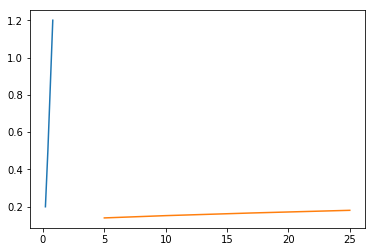

In [18]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
list1=[5,10,17,25]
list2=[0.3,0.6,0.8,1.15]
list3=[0.2,0.4,0.6,0.8]
list4=[0.2,0.5,0.85,1.2]
plt.plot(list3,list4)
z=np.polyfit(list1, list2, 1)
p=np.poly1d(z)
y = [0.04074*xx + 0.132 for xx in list4]
plt.plot(list1,y)

In [ ]:
########0918
import pandas as pd
from tqdm import tqdm
import numpy as np
from numpy import random as nr
def is_leap_year(year):
    if (year % 4 == 0 and year % 100 != 0) or year % 400 == 0:
        return True
    else:
        return False
def da(year, month, day):
    leap_year = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    no_leap_year = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    if is_leap_year(year):
        result = sum(leap_year[:month - 1]) + day
    else:
        result = sum(no_leap_year[:month - 1]) + day
    if year == 2018:
        return result+365
    return result
def getyears(string):
    year = round(string/10000)
    return year
def getmonths(string):
    year = round(string/10000)*10000
    year = string - year
    month = round(year/100)
    return month
def getdays(string):
    year = round(string/10000)*10000
    string = string - year
    month = round(string/100)*100
    day = string - month
    return day
df=pd.read_csv('C:/Users/xyttttt/Desktop/goodsale.csv',low_memory=False)
market=pd.read_csv('C:/Users/xyttttt/Desktop/market_day.csv',low_memory=False)
df=df.loc[df['data_date'] >= 20180201]
cols = [col for col in df.columns if col in['sku_id','goods_num']]
df = df.loc[:, cols]
df_group = df.groupby('sku_id')
df_mean = df_group.mean()
df_mean = df_mean*7

res = pd.read_csv('C:/Users/xyttttt/Desktop/submit_example.csv')
r,c = res.shape
for i in tqdm(range(r)):
    sku_id = res.iloc[i,0]
    if sku_id in df_mean.index:
        rand = nr.normal(0,0.7,size = (5,1))
        #df1=df.loc[df['sku_id']==sku_id]
        #row=df1['sku_id'].value_counts().item()
        row=0;
        for k in df['sku_id']:
            if k==sku_id:
                row=row+1;
        for j in range(1,6):
            day=market.loc[market['sku_id']==sku_id]
            days=day.market_date.item()
            list1=[5,10,17,25]
            list2=[0.3,0.6,0.8,1.15]
            z=np.polyfit(list1, list2, 1)
            if days<=20180215:
                if row >= 30:
                    res.iloc[i,j] = np.round((df_mean.loc[sku_id,'goods_num'])*1.05).astype(int)#此权重在1-1.1之间效果较好
                elif row >= 17:
                    res.iloc[i,j] = np.floor((df_mean.loc[sku_id,'goods_num'])*0.72).astype(int)#此权重在0.7到0.75之间效果较好
                elif row >= 8:
                    res.iloc[i,j] = np.floor((df_mean.loc[sku_id,'goods_num'])*0.45).astype(int)#此权重在0.4-0.5之间效果较好
                else:
                    res.iloc[i,j] = np.floor((df_mean.loc[sku_id,'goods_num'])*0.2).astype(int)#此权重未调整
res.to_csv('C:/Users/xyttttt/Desktop/result.csv',index = False)